# Sprint 9 - Machine Learning in Business Project

## Project Description
You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:
 - Collect the oil well parameters in the selected region: oil quality and volume of reserves;
 - Build a model for predicting the volume of reserves in the new wells;
 - Pick the oil wells with the highest estimated values;
 - Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Project instructions
1.	Download and prepare the data. Explain the procedure.
1.	Train and test the model for each region:
    * Split the data into a training set and validation set at a ratio of 75:25.
    * Train the model and make predictions for the validation set.
    * Save the predictions and correct answers for the validation set.
    * Print the average volume of predicted reserves and model RMSE.
    * Analyze the results.
1.	Prepare for profit calculation:
    * Store all key values for calculations in separate variables.
    * Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
    * Provide the findings about the preparation for profit calculation step.
1.	Write a function to calculate profit from a set of selected oil wells and model predictions:
    * Pick the wells with the highest values of predictions.
    * Summarize the target volume of reserves in accordance with these predictions
    * Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
1.	Calculate risks and profit for each region:
    * Use the bootstrapping technique with 1000 samples to find the distribution of profit.
    * Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
    * Provide findings: suggest a region for development of oil wells and justify the choice.

## Data description
Geological exploration data for the three regions are stored in files:
 * `'geo_data_0.csv'`. download dataset
 * `'geo_data_1.csv'`. download dataset
 * `'geo_data_2.csv'`. download dataset
 * id — unique oil well identifier
 * f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
 * product — volume of reserves in the oil well (thousand barrels).


## Conditions:
 * Only linear regression is suitable for model training (the rest are not sufficiently predictable).
 * When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
 * The budget for development of 200 oil wells is 100 USD million.
 * One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
 * After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.


### Step 1
Download and prepare the data. Explain the procedure.

In [1]:
# importing the libraries

import pandas as pd
import numpy as np
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
np.random.seed
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# downloading the data

geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
display(geo_data_0.head())
display(geo_data_1.head())
display(geo_data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [4]:
display(geo_data_0.info())
display(geo_data_1.info())
display(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(geo_data_0.describe())
display(geo_data_1.describe())
display(geo_data_2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [6]:
state = np.random.RandomState(1357)

In [7]:
target = 'product'
features = ['f0', 'f1', 'f2']

gd0_features = geo_data_0.drop(['id', 'product'], axis=1)
gd0_target = geo_data_0['product']

gd1_features = geo_data_1.drop(['id', 'product'], axis=1)
gd1_target = geo_data_1['product']

gd2_features = geo_data_2.drop(['id', 'product'], axis=1)
gd2_target = geo_data_2['product']

There are no missing values and our data is now ready to be split.

### Step 2
Train and test the model for each region:
 - Split the data into a training set and validation set at a ratio of 75:25.
 - Train the model and make predictions for the validation set.
 - Save the predictions and correct answers for the validation set.
 - Print the average volume of predicted reserves and model RMSE.
 - Analyze the results.

In [8]:
# splitting the data into training and validation sets at a ration of 75:25

gd0_features_train, gd0_features_valid, gd0_target_train, gd0_target_valid = train_test_split(
    gd0_features, gd0_target, test_size=0.25, random_state=state)

gd1_features_train, gd1_features_valid, gd1_target_train, gd1_target_valid = train_test_split(
    gd1_features, gd1_target, test_size=0.25, random_state=state)

gd2_features_train, gd2_features_valid, gd2_target_train, gd2_target_valid = train_test_split(
    gd2_features, gd2_target, test_size=0.25, random_state=state)

In [9]:
# standardizing our data
# geo_data_0

numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(gd0_features_train[numeric])
gd0_features_train[numeric] = scaler.transform(gd0_features_train[numeric])
gd0_features_valid[numeric] = scaler.transform(gd0_features_valid[numeric])

display(gd0_features_train.shape)
display(gd0_features_valid.shape)

(75000, 3)

(25000, 3)

In [10]:
# geo_data_1

scaler = StandardScaler()
scaler.fit(gd1_features_train[numeric])
gd1_features_train[numeric] = scaler.transform(gd1_features_train[numeric])
gd1_features_valid[numeric] = scaler.transform(gd1_features_valid[numeric])

display(gd1_features_train.shape)
display(gd1_features_valid.shape)

(75000, 3)

(25000, 3)

In [11]:
# geo_data_2

scaler = StandardScaler()
scaler.fit(gd2_features_train[numeric])
gd2_features_train[numeric] = scaler.transform(gd2_features_train[numeric])
gd2_features_valid[numeric] = scaler.transform(gd2_features_valid[numeric])

display(gd2_features_train.shape)
display(gd2_features_valid.shape)

(75000, 3)

(25000, 3)

In [12]:
# Linear Regression
# geo_data_0

model = LinearRegression()
model.fit(gd0_features_train, gd0_target_train)
predictions_valid_0 = model.predict(gd0_features_valid)
rmse_0 = mean_squared_error(gd0_target_valid, predictions_valid_0)**0.5
display(f'RMSE: {rmse_0}')

display(f'Average Volume of Predicted Reserves: {predictions_valid_0.mean()}')

'RMSE: 37.787036974512255'

'Average Volume of Predicted Reserves: 92.34650540540824'

In [13]:
# geo_data_1

model = LinearRegression()
model.fit(gd1_features_train, gd1_target_train)
predictions_valid_1 = model.predict(gd1_features_valid)
rmse_1 = mean_squared_error(gd1_target_valid, predictions_valid_1)**0.5
display(f'RMSE: {rmse_1}')

display(f'Average Volume of Predicted Reserves: {predictions_valid_1.mean()}')

'RMSE: 0.8853811443767734'

'Average Volume of Predicted Reserves: 68.82125144914508'

In [14]:
# geo_data_2

model = LinearRegression()
model.fit(gd2_features_train, gd2_target_train)
predictions_valid_2 = model.predict(gd2_features_valid)
rmse_2 = mean_squared_error(gd2_target_valid, predictions_valid_2)**0.5
display(f'RMSE: {rmse_2}')

display(f'Average Volume of Predicted Reserves: {predictions_valid_2.mean()}')

'RMSE: 39.831390292313245'

'Average Volume of Predicted Reserves: 95.27089532887021'

Analyzing the results:

We got the following results for our models:
`'geo_data_0'`
 - RMSE: 37.79
 - Average Volume Predicted: 92.35
 
`'geo_data_1'`
 - RMSE: 0.89
 - Average Volume Predicted: 68.82
 
`'geo_data_2'`
 - RMSE: 39.83
 - Average Volume Predicted: 95.27
 
`'geo_data_0'` and `'geo_data_2'` have very similar results with both RMSE results being close to 40 and the average predicted volume being greater than 90. Our results for geo_data_2 are very low compared to the other two.

### Step 3

Prepare for profit calculation:
 - Store all key values for calculations in separate variables.
 - Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
 - Provide the findings about the preparation for profit calculation step.

**Conditions are listed above**

In [15]:
# store all key values for calculations in separate variables

n_points_all = 500
n_points = 200
budget_total = 100_000_000 # for 200
income_per_volume = 4500
thres_risk_max = 2.5/100
budget_per_one = budget_total/n_points
unit_of_volume = 1000 # barrels

In [16]:
# calculate the volume of reserves sufficient for developing a new well without losses.

display(f"The volume of reserves sufficient for developing a new well without losses = {budget_total/n_points/income_per_volume:.2f}")

'The volume of reserves sufficient for developing a new well without losses = 111.11'

Provide the findings about the preparation for profit calculation step:

The average predicted volumes found earlier for each region were: 92.35, 68.82 and 95.27. These predictions are all less than the volumes of reserves sufficient for developing a new well without losses (111.11), therefore, it is our baseline for finding sufficient wells.

### Step 4
Write a function to calculate profit from a set of selected oil wells and model predictions:
 - Pick the wells with the highest values of predictions.
 - Summarize the target volume of reserves in accordance with these predictions
 - Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [17]:
def revenue(target, predicted, count):
    indices = predicted.sort_values(ascending = False).index
    return target[indices][:count].sum() * income_per_volume - budget_total

### Step 5
Calculate risks and profit for each region:
 - Use the bootstrapping technique with 1000 samples to find the distribution of profit.
 - Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
 - Provide findings: suggest a region for development of oil wells and justify the choice.

In [18]:
# using the bootstrapping technique with 1000 samples to find the distribution of profit

def revenue_bs(target, predicted):
    values = []
    target = pd.Series(target.values)
    predicted = pd.Series(predicted)
    for i in range(1000):
        target_sample = target.sample(n=n_points_all, replace=True, random_state=state)
        values.append(revenue(target_sample, predicted[target_sample.index], n_points))
    return pd.Series(values)

In [19]:
revenues0 = revenue_bs(gd0_target_valid, predictions_valid_0)
revenues1 = revenue_bs(gd1_target_valid, predictions_valid_1)
revenues2 = revenue_bs(gd2_target_valid, predictions_valid_2)

In [20]:
display(len(revenues0[revenues0<0])/len(revenues0))

0.05

In [21]:
display(len(revenues1[revenues1<0])/len(revenues1))

0.009

In [22]:
display(len(revenues2[revenues2<0])/len(revenues2))

0.097

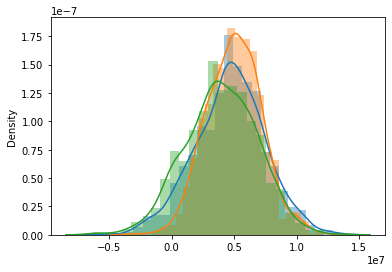

In [23]:
sns.distplot(revenues0)
sns.distplot(revenues1)
sns.distplot(revenues2)
plt.show()

The revenue for all of the regions are profitable for the most part with some loss case.

In [24]:
# finding the average profit, 95% confidence interval and risk of losses

confidence_interval = st.t.interval(0.95, len(revenues0)-1, revenues0.mean(), revenues0.sem())
loss_risk = len(revenues0[revenues0 < 0]) / len(revenues0)
print(f"""average profit of first region is {revenues0.mean():.2f}, 95% confidence interval is  ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) \
and risk of losses {loss_risk:.2%}""")

average profit of first region is 4658240.50, 95% confidence interval is  (4484213.46, 4832267.54) and risk of losses 5.00%


In [25]:
confidence_interval = st.t.interval(0.95, len(revenues1)-1, revenues1.mean(), revenues1.sem())
loss_risk = len(revenues1[revenues1 < 0]) / len(revenues1)
print(f"""average profit of second region is {revenues1.mean():.2f}, 95% confidence interval is  ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) \
and risk of losses {loss_risk:.2%}""")

average profit of second region is 5001260.65, 95% confidence interval is  (4865421.85, 5137099.46) and risk of losses 0.90%


In [26]:
confidence_interval = st.t.interval(0.95, len(revenues2)-1, revenues2.mean(), revenues2.sem())
loss_risk = len(revenues2[revenues2 < 0]) / len(revenues2)
print(f"""average profit of third region is {revenues2.mean():.2f}, 95% confidence interval is  ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}) \
and risk of losses {loss_risk:.2%}""")

average profit of third region is 3945571.78, 95% confidence interval is  (3766812.79, 4124330.77) and risk of losses 9.70%


**Provide findings: suggest a region for development of oil wells and justify the choice.**

Looking at the average profit, confidence interval and risk of losses, the best region is the second region (`'geo_data_1'`). The average profit is higher than the two others and the risk of loss is at the lowest with 1%.